# Statistical Inference: Hypotesis testing and Significance
## Rejection Region

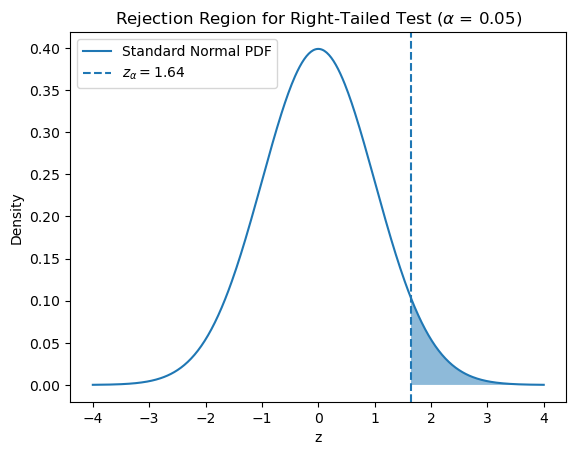

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

alpha = 0.05
z_alpha = norm.ppf(1 - alpha)

x = np.linspace(-4, 4, 400)
pdf = norm.pdf(x)

plt.plot(x, pdf, label='Standard Normal PDF')
x_fill = np.linspace(z_alpha, 4, 100)
plt.fill_between(x_fill, norm.pdf(x_fill), alpha=0.5)
plt.axvline(z_alpha, linestyle='--', label=f'$z_{{\\alpha}} = {z_alpha:.2f}$')

plt.title(r'Rejection Region for Right-Tailed Test ($\alpha$ = 0.05)')
plt.xlabel('z')
plt.ylabel('Density')
plt.legend()
plt.savefig("output_graph_9.png")
plt.show()

## Standardized Test Statistic

In [ ]:
# Given data
xbar, mu0, s, n = 725, 670, 102, 40
alpha = 0.01

# Compute test statistic and critical value
z_obs    = (xbar - mu0) / (s / np.sqrt(n))
z_crit   = norm.ppf(1 - alpha)

# Decision
if z_obs > z_crit:
    decision = "Reject H0"
else:
    decision = "Fail to reject H0"

print(f"z_obs = {z_obs:.2f}, z_crit = {z_crit:.2f}")
print(decision)

z_obs = 3.41, z_crit = 2.33
Reject H0


## Rejection Region vs Acceptance Region

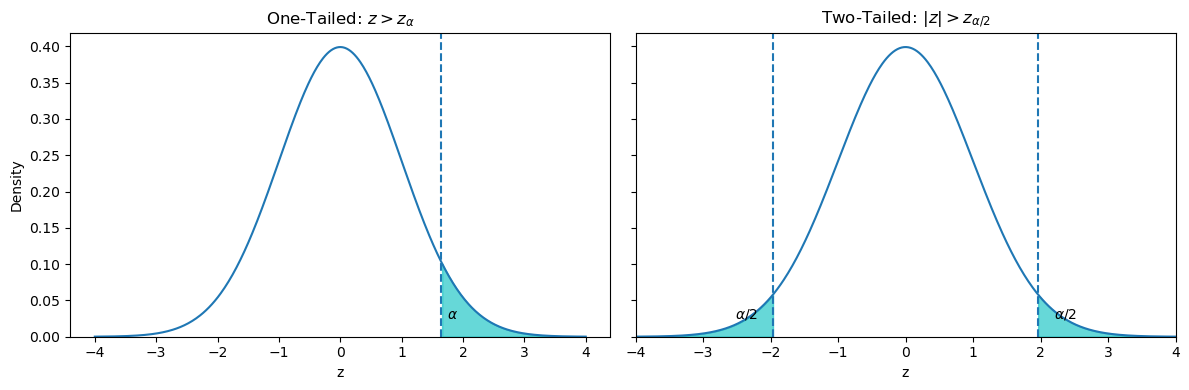

In [10]:
# significance level
alpha = 0.05
z_alpha = norm.ppf(1 - alpha)      # one‐tailed critical value
z_alpha2 = norm.ppf(1 - alpha/2)   # two‐tailed critical value

# x grid and density
x = np.linspace(-4, 4, 500)
y = norm.pdf(x)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

# --- One‐tailed plot ---
ax1.plot(x, y)
# shade right tail
mask1 = x >= z_alpha
ax1.fill_between(x[mask1], y[mask1], alpha=0.6, color='c')
# critical line
ax1.axvline(z_alpha, linestyle='--')
# labels
ax1.set_title('One-Tailed: $z > z_\\alpha$')
ax1.set_xlabel('z')
ax1.set_ylabel('Density')
# annotate $\alpha$ under the shaded region
ax1.text(z_alpha + 0.1, 0.02, r'$\alpha$', va='bottom')

# --- Two‐tailed plot ---
ax2.plot(x, y)
# shade both tails
mask_lo = x <= -z_alpha2
mask_hi = x >=  z_alpha2
ax2.fill_between(x[mask_lo], y[mask_lo], alpha=0.6, color='c')
ax2.fill_between(x[mask_hi], y[mask_hi], alpha=0.6, color='c')
# critical lines
ax2.axvline(-z_alpha2, linestyle='--')
ax2.axvline( z_alpha2, linestyle='--')
# labels
ax2.set_title('Two-Tailed: $|z| > z_{\\alpha/2}$')
ax2.set_xlabel('z')
# annotate \alpha/2 under each tail
ax2.text(-z_alpha2 - 0.4, 0.02, r'$\alpha/2$', va='bottom', ha='center')
ax2.text( z_alpha2 + 0.4, 0.02, r'$\alpha/2$', va='bottom', ha='center')

# layout
plt.xlim(-4, 4)
plt.ylim(0, y.max() + 0.02)
plt.tight_layout()
plt.savefig("output_graph_10.png")
plt.show()

## Calculating the p-value

In [11]:
# Given data
xbar, mu0, s, n = 871, 880, 21, 50

# Compute test statistic
z_obs = (xbar - mu0) / (s / np.sqrt(n))

# Two-tailed p-value  sf = 1−cdf
p_val = 2 * norm.sf(abs(z_obs)) 

print(f"Observed z = {z_obs:.2f}")
print(f"Two-tailed p-value = {p_val:.4f}")

# Conclusion at alpha = 0.01
alpha = 0.05
if p_val <= alpha:
    print("Reject H0: evidence of change in daily yield.")
else:
    print("Fail to reject H0: no evidence of change.")

Observed z = -3.03
Two-tailed p-value = 0.0024
Reject H0: evidence of change in daily yield.


## Both approaches

In [ ]:
# Given data
xbar, mu0, s, n = 3400, 3300, 1100, 100
diff = xbar - mu0
alpha = 0.05

# Compute test statistic and p-value
z_obs = (xbar - mu0) / (s / np.sqrt(n))
z_alpha = norm.ppf(1 - alpha)
p_val = 1 - norm.cdf(z_obs)

print(f"Observed z = {z_obs:.4f}")
print(f"Critical value threeshold z_alpha = {z_alpha:.4f}")
print(f"One-tailed p-value = {p_val:.4f}")

# Decision
if p_val <= alpha:
    print("Reject H0: mean sodium > 3300 mg")
else:
    print("Fail to reject H0: no evidence mean > 3300 mg")

100
Observed z = 0.9091
Critical value threeshold z_alpha = 1.6449
One-tailed p-value = 0.1817
Fail to reject H0: no evidence mean > 3300 mg


## Difference between two means

In [ ]:
# Data
x1, s1, n1 = 2.70, np.sqrt(0.36), 100
x2, s2, n2 = 2.54, np.sqrt(0.40), 100

# Compute z and p-value
num    = (x1 - x2)
den    = np.sqrt(s1**2/n1 + s2**2/n2)
z_obs  = num / den
p_val  = 2 * norm.sf(abs(z_obs))

print(f"z = {z_obs:.2f}, p-value = {p_val:.4f}")

z = 1.84, p-value = 0.0665
